# Libraries

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Data

In [2]:
data = pd.read_csv("./data/titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Histogram

##### **Graph explanation**
Most common graph type for data distribution. On the x-axis we have the range that a specific parameter reaches, and on the y-axis we have the number of samples belonging to a specific range.

##### **Code explanation**
`plt.figure(figsize=(10, 5))`<br/>
&nbsp;&nbsp;&nbsp;&nbsp;**figsize** is graph size in inches.

`plt.hist(data.Age, bins=32, color='#c41414')`<br/>
&nbsp;&nbsp;&nbsp;&nbsp;This is a function that create the histogram. First argument is numeric data and bins is number of bars building the histogram.

`plt.title('Age distribution')`<br/>
&nbsp;&nbsp;&nbsp;&nbsp;Title of graph.

`plt.xticks(np.arange(0, 81, 10), [f"{yrs} yrs." for yrs in np.arange(0, 81, 10)])`<br/>
&nbsp;&nbsp;&nbsp;&nbsp;This functions set the current tick locations and labels of the x-axis. First argument is tick locations and a second argument is label for all set ticks.

`plt.xlim(-3, 83)`<br/>
&nbsp;&nbsp;&nbsp;&nbsp; Limits of the current x-axes.

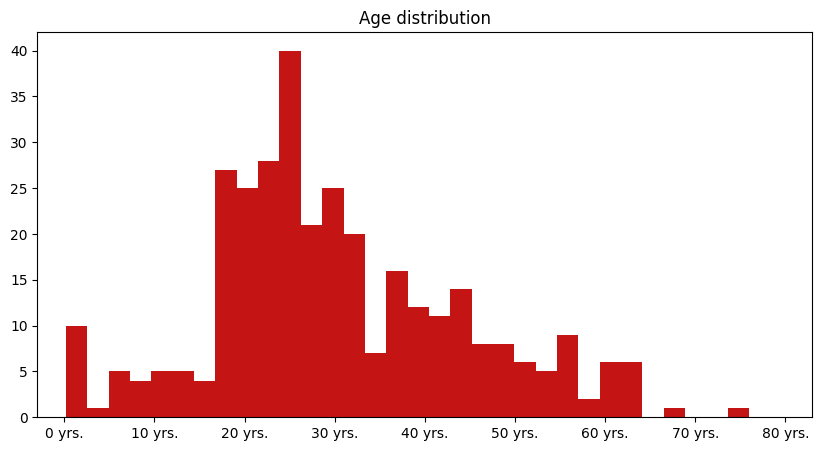

In [60]:
plt.figure(figsize=(10, 5))
plt.hist(data.Age, bins=32, color='#c41414')
plt.title('Age distribution')
plt.xticks(np.arange(0, 81, 10), [f"{yrs} yrs." for yrs in np.arange(0, 81, 10)])
plt.xlim(-3, 83)
plt.show()

# KDE plot

##### **Graph explanation**
Density plot or KDE (kernel density estimation) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. As a result we get smoother histogram shows data distribution, but the biggest disadvantage is that the chart are not precise and not presentable observations data one-to-one. More informations: <a href="https://www.youtube.com/watch?v=x5zLaWT5KPs">Intro to Kernel Density Estimation Youtube</a>, <a href="https://en.wikipedia.org/wiki/Kernel_density_estimation">Kernel density estimation Wikipedia</a>

##### **Code explanation**
`sns.kdeplot(data, x='Age', bw_adjust=1, color='red', fill=True, cut=0)`<br/>
&nbsp;&nbsp;&nbsp;&nbsp;Function for creating a KDE plot. First arguments is a dataset and next we specify a few arguments:
- **x** - Column from data dataset with numeric data.
- **bw_adjust** - A paremeter that determines how smooth the curve is. Larger values = smoother curve.
- **fill** - Whether the chart is filled with color.
- **cut** - This determines how far the evaluation grid extends past the extreme datapoints.

`plt.xlabel('')`<br/>
&nbsp;&nbsp;&nbsp;&nbsp;**xlabel** function set the graph x-axis title. In this case we delete title by setting it to empty string.

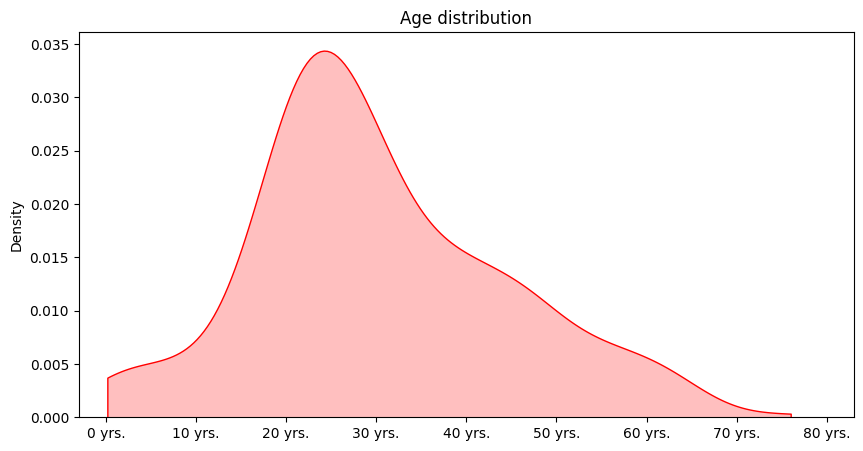

In [61]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data, x='Age', bw_adjust=1, color='red', fill=True, cut=0)
plt.title("Age distribution")
plt.xlabel('')
plt.xticks(np.arange(0, 81, 10), [f"{yrs} yrs." for yrs in np.arange(0, 81, 10)])
plt.xlim(-3, 83)
plt.show()

# Stacked histograms

##### **Graph explanation**
Normal histograms but the values of the two histograms are superimposed on each other.

##### **Code explanation**
`notSurvived = data[data['Survived'] == 0]['Age']`<br/>
`survived = data[data['Survived'] == 1]['Age']`<br/>
&nbsp;&nbsp;&nbsp;&nbsp;This segment creates two dataframes with passengers who survived and those who did not survive.

`plt.hist([notSurvived, survived], bins = 16, stacked = True, color=['#714da1', '#b57dff'])`<br/>
&nbsp;&nbsp;&nbsp;&nbsp;Similar to a case with single histogram first arguments is list n (in this case 2) datasets with numeric observations. To stacked all these histograms we set **stacked** argument to **True**.

`plt.legend(["Not survived", "Survived"])`<br/>
&nbsp;&nbsp;&nbsp;&nbsp;A legend displayed in one of the corners with an explanation of which color means what.

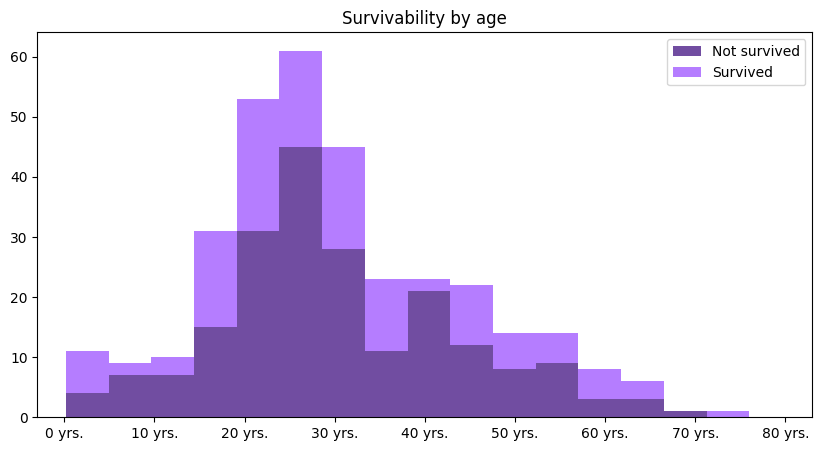

In [62]:
notSurvived = data[data['Survived'] == 0]['Age']
survived = data[data['Survived'] == 1]['Age']

plt.figure(figsize=(10, 5))
plt.hist([notSurvived, survived], bins = 16, stacked = True, color=['#714da1', '#b57dff'])
plt.title("Survivability by age")
plt.xticks(np.arange(0, 81, 10), [f"{yrs} yrs." for yrs in np.arange(0, 81, 10)])
plt.xlim(-3, 83)
plt.legend(["Not survived", "Survived"])
plt.show()

# Stacked KDE plots

##### **Graph explanation**
Similar to stacked histograms there are density plots superimposed on each other.

##### **Code explanation**
`sns.kdeplot(data, x='Age', hue='Survived', multiple='stack', fill=True, palette='Blues', cut=0)`<br/>
&nbsp;&nbsp;&nbsp;&nbsp;To create stacked KDE plot we have to set a few parameters:
- **hue** - To determine which feature will divide into fragments.
- **multiple** - To determine which type of division we want to use. **'stack'** give us stacked charts.
- **palette** - Also we use color palette and we set this argument to **'Blues'**, that give us charts on blue scale. More info about color scalers <a href="https://matplotlib.org/stable/users/explain/colors/colormaps.html">here</a>.

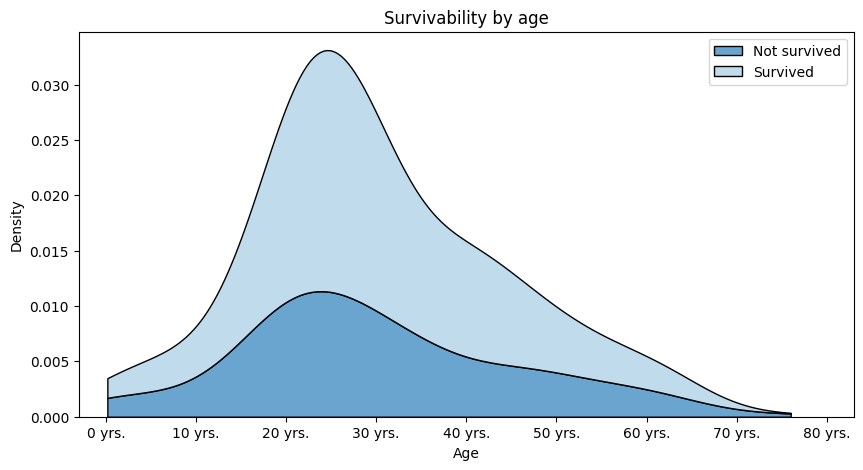

In [63]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data, x='Age', hue='Survived', multiple='stack', fill=True, palette='Blues', cut=0)
plt.title("Survivability by age")
plt.xticks(np.arange(0, 81, 10), [f"{yrs} yrs." for yrs in np.arange(0, 81, 10)])
plt.xlim(-3, 83)
plt.legend(["Not survived", "Survived"])
plt.show()

# Overlapping histograms

##### **Graph explanation**
These are histograms that overlap.

##### **Code explanation**
`sns.histplot(data, x='Age', hue='Pclass', palette='hot', bins=19)`<br/>
&nbsp;&nbsp;&nbsp;&nbsp;In this case we use seaborn library in contrast to stacked histograms where we use matplotlib. To specify which feature will divide histograms to overlaped groups we have to set hue argument. Here we set to **'Pclass'**.

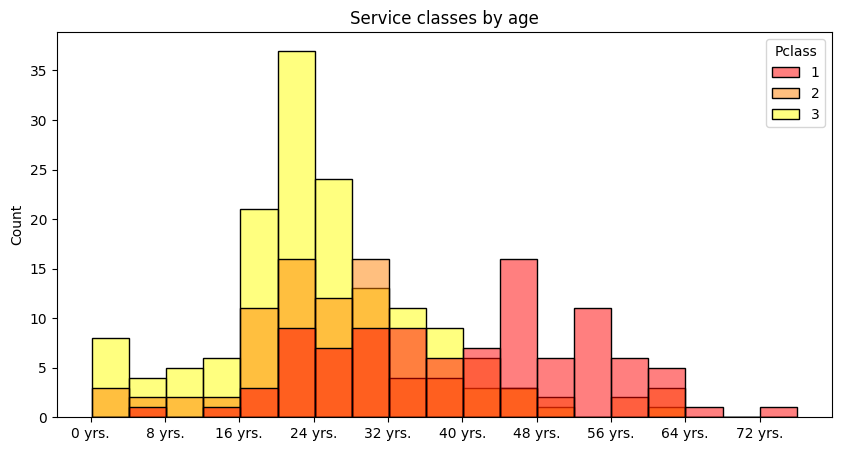

In [72]:
plt.figure(figsize=(10, 5))
sns.histplot(data, x='Age', hue='Pclass', palette='autumn', bins=19)
plt.xticks(np.arange(0, 77, 8), [f"{yrs} yrs." for yrs in np.arange(0, 77, 8)])
plt.title("Service classes by age")
plt.xlabel('')
plt.show()

# Overlapping KDE plots

##### **Graph explanation**
These are overlap KDE plots and as you can see overlapping density plots are more readable than overlapping histograms.

##### **Code explanation**
`sns.kdeplot(data, x='Age', hue='Pclass', fill=True, palette='summer', cut=0)`<br/>
&nbsp;&nbsp;&nbsp;&nbsp;Situation is the same as in stacked density plots, but we don't set multiple argument to **'stack'**.

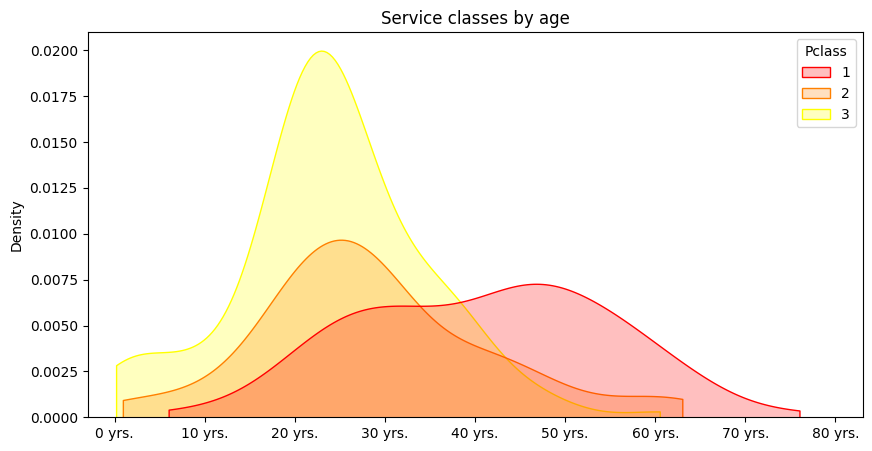

In [78]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data, x='Age', hue='Pclass', fill=True, palette='autumn', cut=0)
plt.xticks(np.arange(0, 81, 10), [f"{yrs} yrs." for yrs in np.arange(0, 81, 10)])
plt.xlim(-3, 83)
plt.title("Service classes by age")
plt.xlabel('')
plt.show()

# Box plot

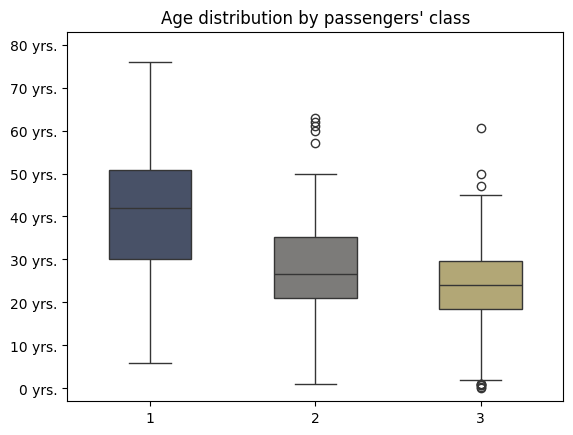

In [84]:
sns.boxplot(data, y='Age', x='Pclass', palette='cividis', width=0.5)
plt.yticks(np.arange(0, 81, 10), [f"{yrs} yrs." for yrs in np.arange(0, 81, 10)])
plt.ylim(-3, 83)
plt.title("Age distribution by passengers' class")
plt.xlabel('')
plt.ylabel('')
plt.show()

# Violin plot

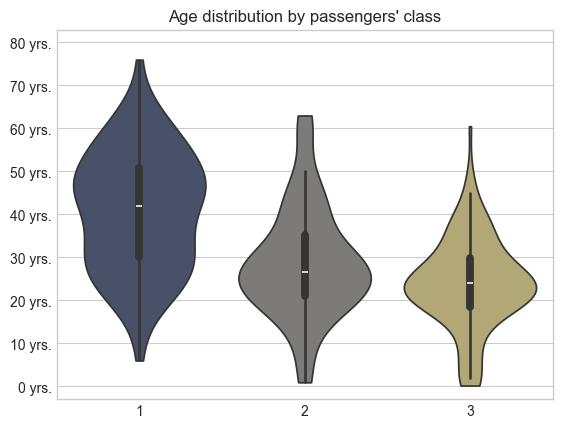

In [85]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.violinplot(
    data, x='Pclass', y='Age', palette='cividis', cut=0
)
plt.yticks(np.arange(0, 81, 10), [f"{yrs} yrs." for yrs in np.arange(0, 81, 10)])
plt.ylim(-3, 83)
plt.title("Age distribution by passengers' class")
plt.xlabel('')
plt.ylabel('')
plt.show()
plt.style.use('default')

# Strip plot

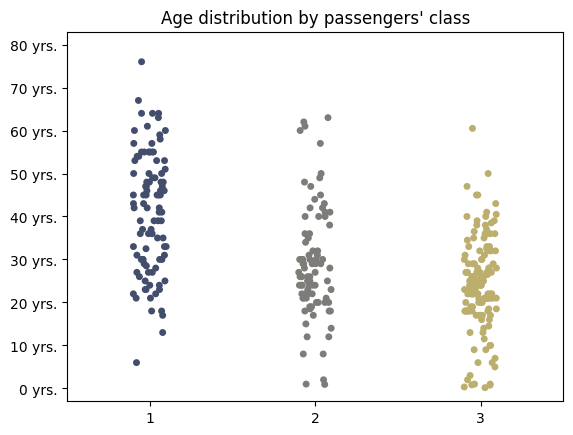

In [88]:
sns.stripplot(data, x='Pclass', y='Age', palette='cividis', legend=False)
plt.yticks(np.arange(0, 81, 10), [f"{yrs} yrs." for yrs in np.arange(0, 81, 10)])
plt.ylim(-3, 83)
plt.title("Age distribution by passengers' class")
plt.xlabel('')
plt.ylabel('')
plt.show()

# Q-Q plot

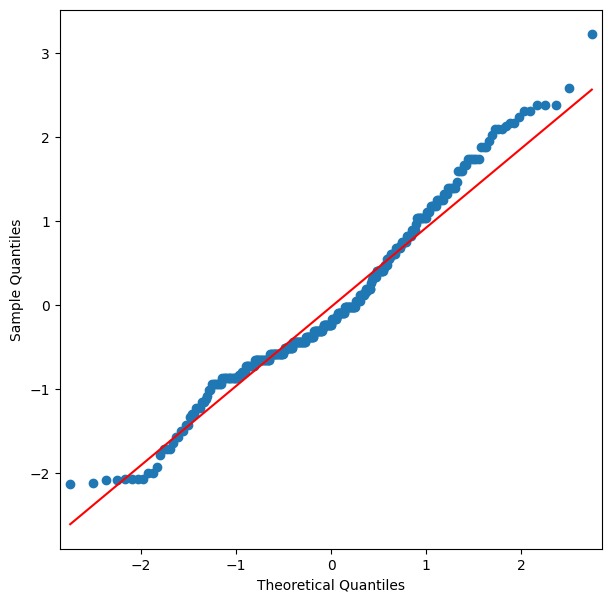

In [95]:
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import StandardScaler

age = data.Age.copy().dropna().to_numpy()
age = StandardScaler().fit_transform(age.reshape((len(age), 1)))
age = age.reshape((len(age)))

fig, ax = plt.subplots(figsize=(7, 7))
sm.qqplot(age, dist=stats.norm, ax=ax, line='q')
plt.show()